# Avocado Data

<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">

## avocado.csv file

In [1]:
import pandas as pd

avocado_csv = pd.read_csv("avocado.csv", index_col = 0)

avocado_csv.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Somewhat ordered:

+ Dates are in order, but in chunks
+ Observations are grouped by region
+ Looks like several data sets taken in different places joined together into one

#### Index
Original index is a series of numbers. We'll replace it with the column containing dates.

#### Date

Dates range from 2015-01-04 to 2018-03-25.

#### AveragePrice

Average price per avocado sold.

#### Total Volume

Number of individual avocadoes sold. The number is not an integer, so I believe we could say that this number is the average volume in a week, which is the spacing between the observations.

#### 4046, 4225, 4770

These represent small, large and extra-large avocadoes, respectively.

#### Bag Columns

These are bag details for avocadoes sold in bags. We'll cut out this data because I'd like to focus on the other columns instead.

#### type

Organic or conventional. We'll split the data into two sets, one for organic and one for conventional.

#### year

Year of the observation.

#### region

Region of the United States where the observation was made.

In [2]:
file = pd.read_csv("avocado.csv", index_col = 1, parse_dates = True)

avo = pd.DataFrame(index = file.index)
avo['Price'] = file['AveragePrice']
avo['Volume'] = file['Total Volume']
avo['Small'] = file['4046']
avo['Large'] = file['4225']
avo['Extra-Large'] = file['4770']
avo['Type'] = file['type']
avo['Year'] = file['year']
avo['Region'] = file['region']

avo.sort_index(inplace = True)

avo

,Price,Volume,Small,Large,Extra-Large,Type,Year,Region
Date,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,organic,2018,SouthCentral


In [3]:
avoc = avo[avo['Type'] == 'conventional']

avoc

,Price,Volume,Small,Large,Extra-Large,Type,Year,Region
Date,,,,,,,,
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,conventional,2015,Pittsburgh
2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,conventional,2015,WestTexNewMexico
2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,conventional,2015,LosAngeles
2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,conventional,2015,Atlanta
2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,conventional,2015,LasVegas
...,...,...,...,...,...,...,...,...
2018-03-25,1.39,641462.43,26019.52,479186.12,1883.17,conventional,2018,Boston
2018-03-25,1.32,429132.50,258217.83,25970.97,1426.07,conventional,2018,Orlando
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,conventional,2018,Chicago


In [4]:
avoo = avo[avo['Type'] == 'organic']

avoo

,Price,Volume,Small,Large,Extra-Large,Type,Year,Region
Date,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,organic,2015,Boise
2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,organic,2015,LasVegas
...,...,...,...,...,...,...,...,...
2018-03-25,1.75,5518.73,171.22,806.65,3.93,organic,2018,Jacksonville
2018-03-25,1.42,17340.49,295.16,3478.97,81.25,organic,2018,RichmondNorfolk
2018-03-25,1.74,38441.23,27.25,2031.54,0.00,organic,2018,Boston


In [5]:
from scipy import stats

mp = avoc['Price'].mean()

stats.ttest_1samp(avoo['Price'], mp)

Ttest_1sampResult(statistic=130.319161786808, pvalue=0.0)

In [6]:
mv = avoc['Volume'].mean()

stats.ttest_1samp(avoo['Volume'], mv)

Ttest_1sampResult(statistic=-1076.7664484719378, pvalue=0.0)

#### T-Test

This test on the means of both price and volume support the separation of the data into a set for conventional avocadoes and organic avocadoes.

<AxesSubplot:xlabel='Date'>

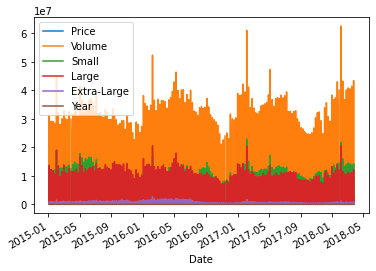

In [7]:
avoc.plot()

<AxesSubplot:xlabel='Date'>

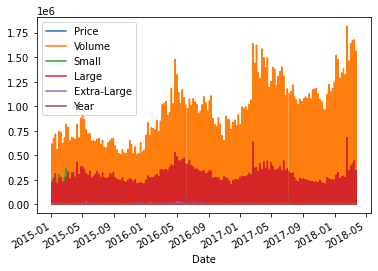

In [8]:
avoo.plot()

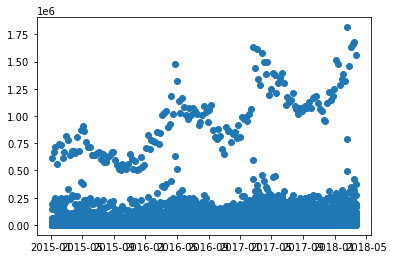

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = avoo.index, y = avoo['Volume'])

#### Initial Observations

Since avocado is a produce, its availability and quality are seasonal, and this is reflected in both plots, with a spike in volume between January and May. Notice also the overall tendency of organic avocado to increase in volume, while conventional avocadoes seem to have a consistent fluctuation. This could be a reflexion of changing consumer preferences.

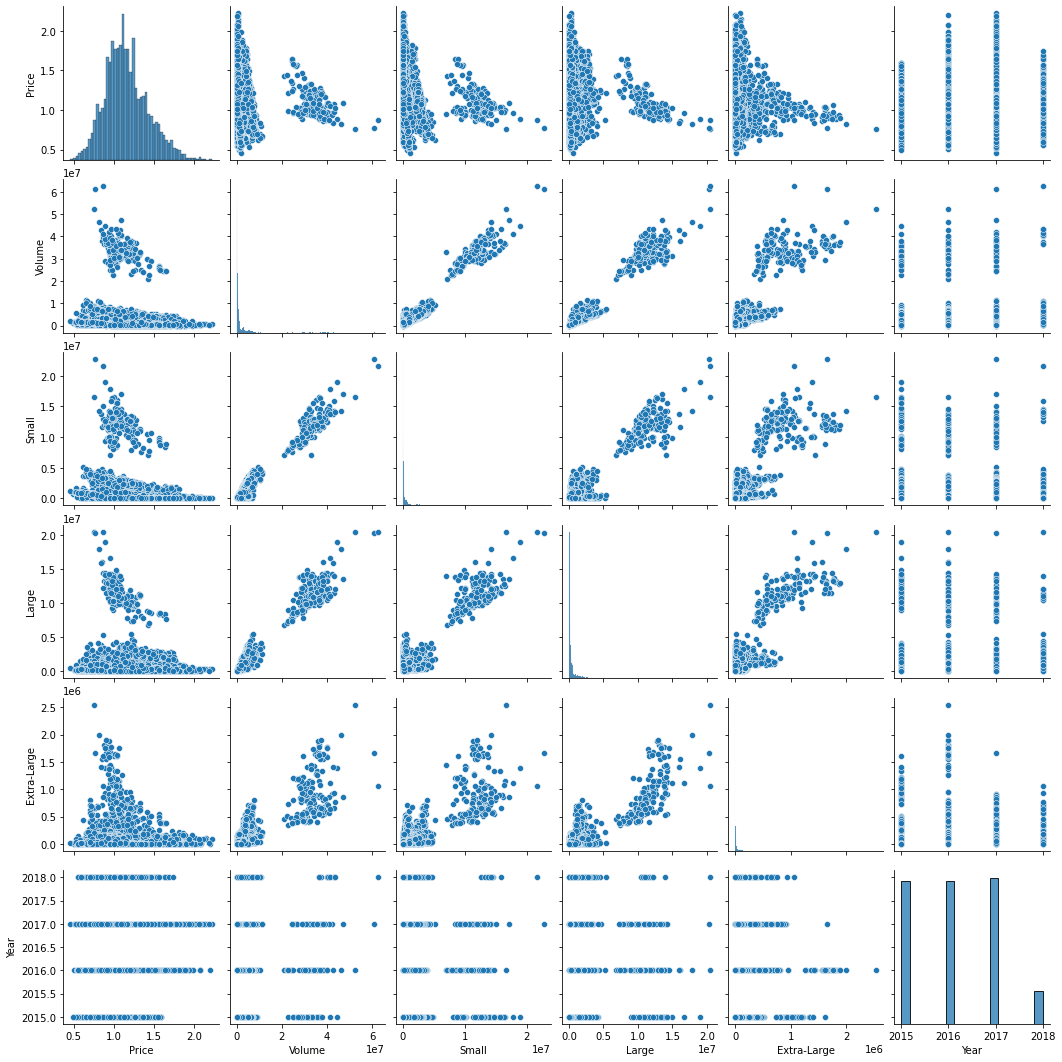

In [10]:
import seaborn as sns

sns.pairplot(avoc)

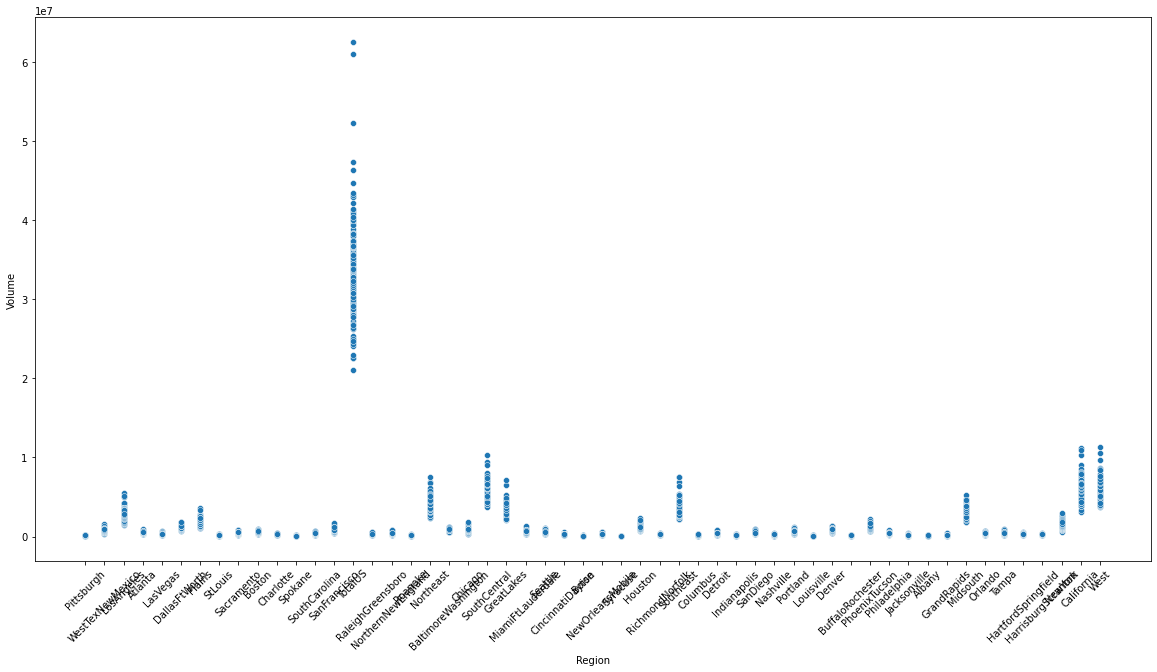

In [11]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = avoc, x = 'Region', y = 'Volume')
plt.xticks(rotation = 45)
plt.show()

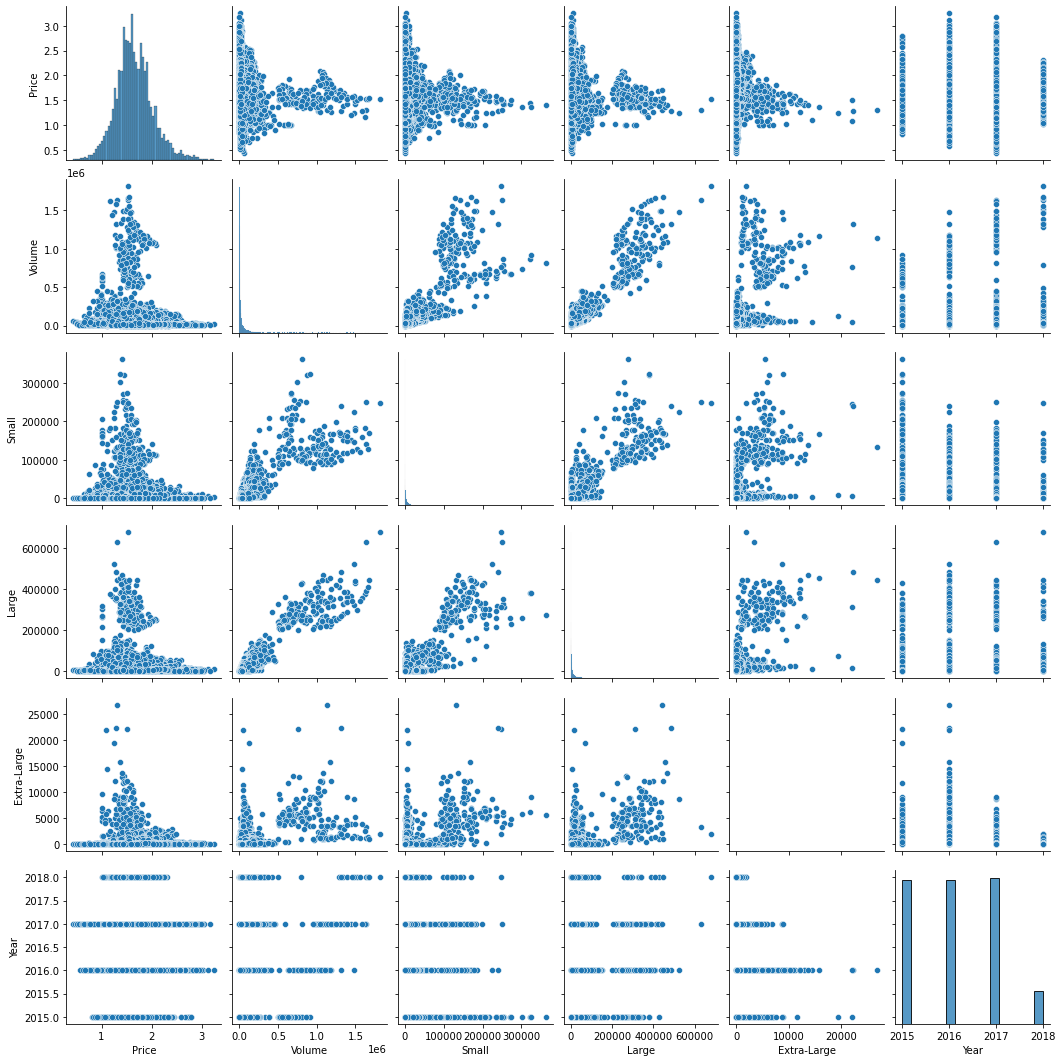

In [12]:
sns.pairplot(avoo)

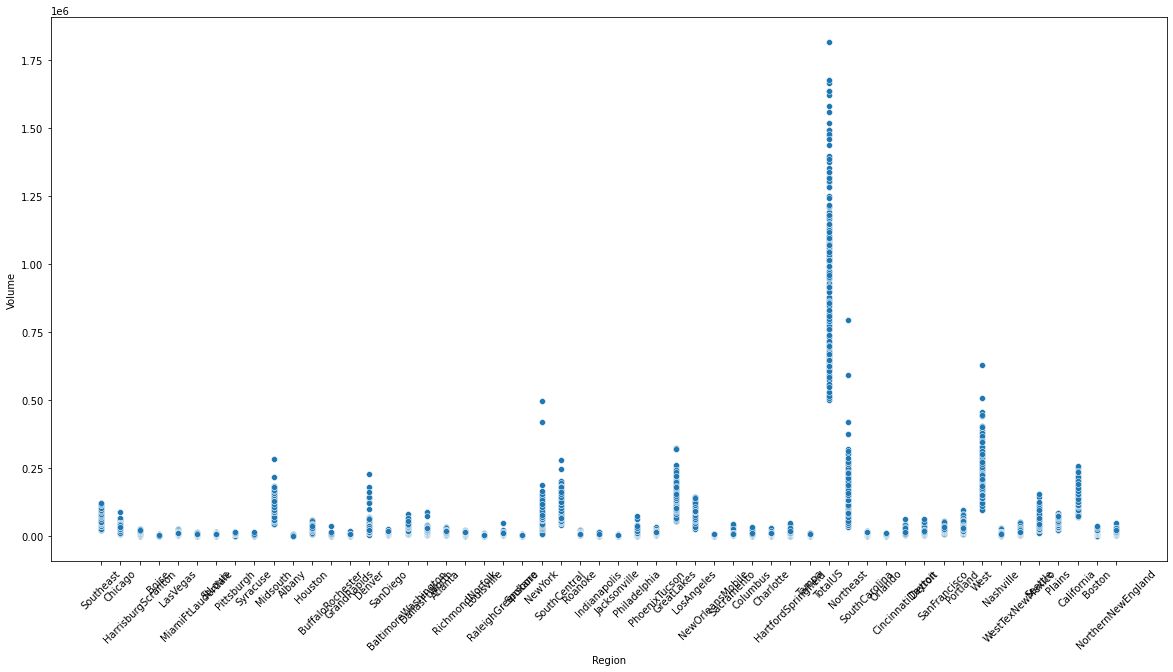

In [13]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = avoo, x = 'Region', y = 'Volume')
plt.xticks(rotation = 45)
plt.show()

#### Observations

Both types of avocadoes follow similar trends:
+ Volume is normally distributed with respect to price.
+ Volume is correlated with each avocado size, which are correlated to each other.

The main difference is that the organic avocadoes have a bigger range for Price and a smaller range for Volume

#### Decisions

+ Look at volume, date, region
+ Each region should be considered separately, or the section "TotalUS"
+ Linear regression could possibly be used to model volume over time for organic avocadoes in TotalUS

<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">
<img src = "avocado.png" width = "150" style = "float : left;">

## Regression

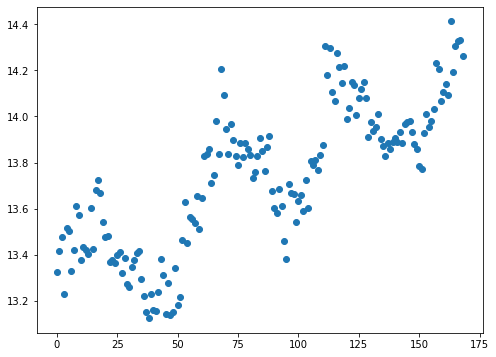

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8.0, 6.0)

a = avoo[(avoo['Region'] == 'TotalUS')]

ar = np.arange(len(a.index))

a.set_index(ar, inplace = True)

plt.figure()
plt.scatter(a.index, np.log(a['Volume']))
plt.show()

In [33]:
import statsmodels.formula.api as smf

model = smf.ols(data = a, formula = 'Volume ~ a.index')
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     261.7
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           5.15e-36
Time:                        08:09:31   Log-Likelihood:                -2292.4
No. Observations:                 169   AIC:                             4589.
Df Residuals:                     167   BIC:                             4595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.619e+05    2.9e+04     19.372      0.000    5.05e+05    6.19e+05
a.index     4829.8411    298.586     16.176      0.000    4240.351    5419.331
==============================================================================
Omnibus:                        9.856   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.180
Skew:                           0.598   Prob(JB):                      0.00616
Kurtosis:                       3.120   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

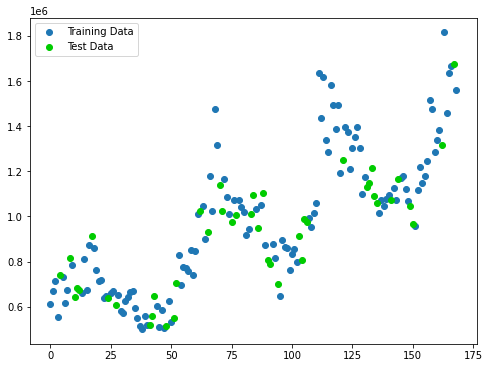

In [34]:
from sklearn import model_selection, metrics

train, test = model_selection.train_test_split(a, random_state=46)

plt.scatter(train.index, train['Volume'],label='Training Data')
plt.scatter(test.index, test['Volume'],color='#00CC00',label='Test Data')
plt.legend();

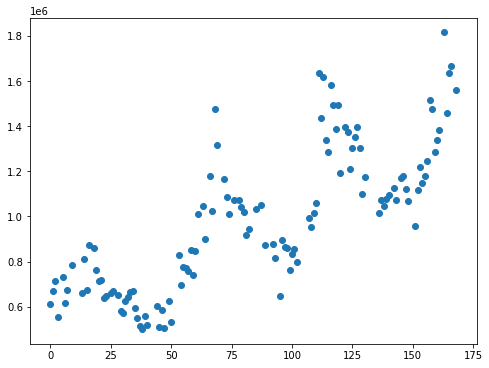

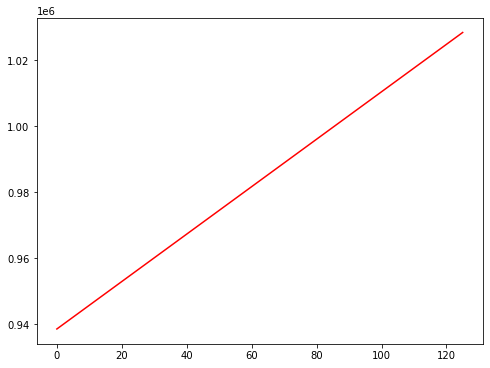

In [66]:
from scipy import stats

artrain = np.arange(len(train.index))

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(artrain, train['Volume'])

train_regr = intercept + slope * artrain

plt.scatter(train.index, train['Volume'])
plt.show()
plt.plot(artrain, train_regr, color='red');
plt.show()

#### Tests on training data

In [67]:
metrics.r2_score(train['Volume'], train_regr)

0.006773987094978118

In [68]:
metrics.mean_absolute_error(train['Volume'], train_regr)

265605.05434039014

#### Tests on test data

In [69]:
artest = np.arange(len(test))

metrics.r2_score(test['Volume'], intercept + slope*artest)

-0.0023595916374345993

In [70]:
metrics.mean_absolute_error(test['Volume'], intercept + slope*artest)

193133.0540133604